# Evaluación 3

---




**Integrantes:**

+ Integrante 1: Neidan Martinez : neidan.martinez2201@ubiobio.cl
+ Integrante 2: Jean Muñoz : jean.munoz2201@ubiobio.cl
+ Integrante 2: Benjamin Escobar : Benjamin.escobar2201@ubiobio.cl
**Fecha de Creación: Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [65]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-13 15:19:29--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv.1’

dataset_churn_2025. 100%[===================>] 393.03K  --.-KB/s    in 0.02s   

2025-06-13 15:19:30 (23.4 MB/s) - ‘dataset_churn_2025.csv.1’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.tree import plot_tree

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

# Fase 4 - Modelamiento

## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

In [67]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


$\textbf{COMENTARIO}$

+ Se aprecia la existencia de 6 variables cuantitativas y 1 variable cualitativa.
+ Además no se aprecian valores nulos.

In [69]:
data.dtypes

,0
age,int64
months_active,int64
monthly_spend,float64
support_calls,int64
contract_type,object
has_discount,int64
churn,int64


In [70]:
data.shape

(15000, 7)

---
✅ **Interpretación**

---

Existen 15000 observaciones que corresponden a 15000 clientes de los cuales se tienen 7 características o variables.

In [71]:
data.groupby("churn").size()

,0
churn,
0,9988
1,5012


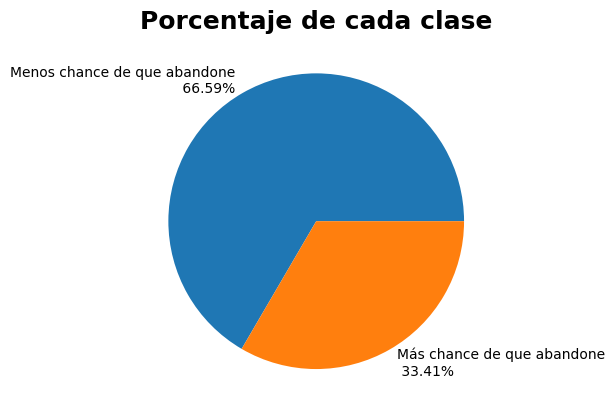

In [72]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data[data.churn == 0.0].shape[0],
                   data[data.churn == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Menos chance de que abandone\n ' + labels[0]
labels[1] = 'Más chance de que abandone\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

---
✅ Interpretación

---
Se puede apreciar una distribución inclinada hacia el lado de "Menos chance de que abandone".

### Selección de variables independientes (1 punto)

In [73]:
# Obtiene las columnas a codificar
categorical_features = data.describe(include = np.object_).columns
# Usa ordinal encoder
for feature in categorical_features:
  encoder = OrdinalEncoder(categories = [data[feature].unique()])
  data[f'{feature}_codificado'] = encoder.fit_transform(data[[feature]])

data

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn,contract_type_codificado
0,56,15,181.55,2,mes_a_mes,1,0,0.0
1,69,57,182.60,4,1_ano,0,0,1.0
2,46,58,109.54,1,1_ano,1,0,1.0
3,32,35,125.52,4,mes_a_mes,1,1,0.0
4,60,24,199.34,4,mes_a_mes,1,1,0.0
...,...,...,...,...,...,...,...,...
14995,72,11,97.57,5,mes_a_mes,0,1,0.0
14996,30,32,60.65,2,2_anos,0,0,2.0
14997,26,42,19.30,4,2_anos,1,0,2.0
14998,73,59,26.47,1,1_ano,0,0,1.0


In [74]:
# Separa variables independientes de la dependiente
data_final = data.drop(categorical_features, axis=1)
data_final

,age,months_active,monthly_spend,support_calls,has_discount,churn,contract_type_codificado
0,56,15,181.55,2,1,0,0.0
1,69,57,182.60,4,0,0,1.0
2,46,58,109.54,1,1,0,1.0
3,32,35,125.52,4,1,1,0.0
4,60,24,199.34,4,1,1,0.0
...,...,...,...,...,...,...,...
14995,72,11,97.57,5,0,1,0.0
14996,30,32,60.65,2,0,0,2.0
14997,26,42,19.30,4,1,0,2.0
14998,73,59,26.47,1,0,0,1.0


### Separación datos entrenamiento y test (1 punto)

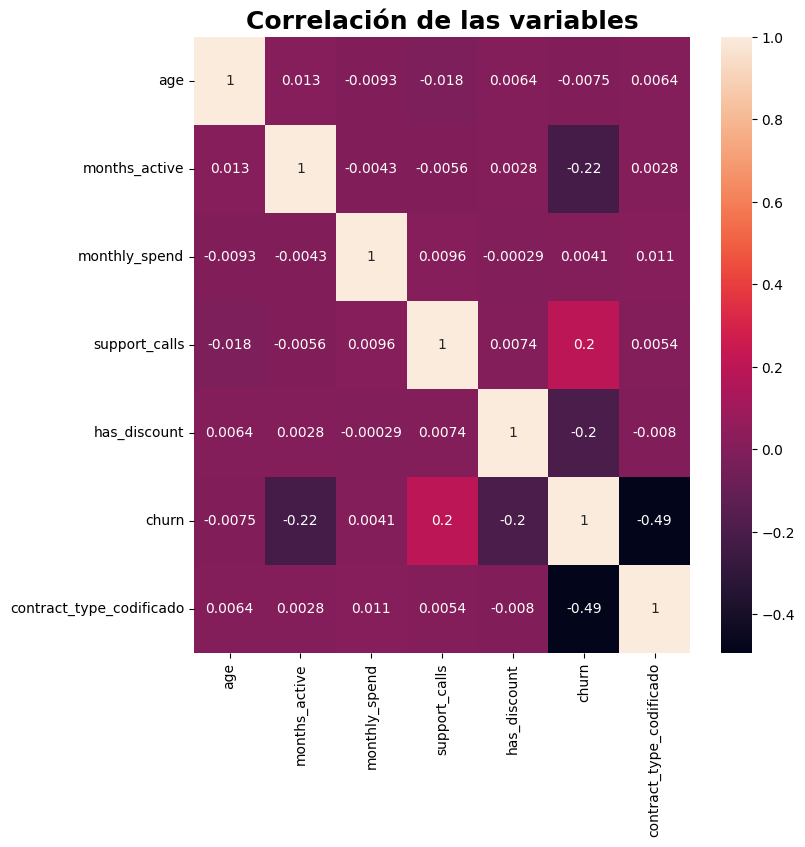

In [75]:
plt.figure(figsize=(8,8))
sns.heatmap(data_final.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---
Variables más influyentes:
+ La variable más influyente (por correlación) es contract_type_codificado con -0.49, lo que sugiere que el tipo de contrato tiene una fuerte relación con el abandono.

+ support_calls (0.20) también es relevante: clientes que llaman más al soporte tienden a abandonar más.

+ has_discount (-0.20) y months_active (-0.22) también son variables predictivas potencialmente importantes.

+ monthly_spend y age tienen poca o ninguna correlación con el churn, al menos de forma lineal.

+ Además 4 variables presentan una correlación negativa y 2 variables presentan una correlación positiva.


In [76]:
# Calcular la matriz de correlación
matriz_correlacion = data_final.corr()

# Extraer la fila (o columna) correspondiente a 'churn'
correlacion_churn = matriz_correlacion['churn']

# Convertir a DataFrame y ordenar
df_correlacion = pd.DataFrame(correlacion_churn).rename(columns={'churn': 'correlacion'})
df_correlacion = df_correlacion.sort_values(by='correlacion', ascending=False)

# Mostrar
print(df_correlacion)


                          correlacion
churn                        1.000000
support_calls                0.200268
monthly_spend                0.004057
age                         -0.007458
has_discount                -0.199226
months_active               -0.223644
contract_type_codificado    -0.493645


---
✅ **Interpretación**

---
+ Existen 2 variables las cuales presentan una correlación positiva.
+ Existen 4 varialbes las cuales presentan una correlación negativa.
+ Sin embargo las 6 variables son importantes al momento de intentar predecir la variable objetivo, por lo que el modelo se va a entrenar en funcion a algunas de ellas.

In [77]:
print("Mayor correlacion positiva : ",
    df_correlacion.query("correlacion < 1 and correlacion >= 0.19").index.values)

print("Mayor correlacion negativa : ",
    df_correlacion.query("correlacion <= -0.19").index.values)

# Arma la lista con los nombres de las variables
lst_features = np.append(df_correlacion.query("correlacion < 1 and correlacion >= 0.19").index.values,
    df_correlacion.query("correlacion <= -0.19").index.values)

Mayor correlacion positiva :  ['support_calls']
Mayor correlacion negativa :  ['has_discount' 'months_active' 'contract_type_codificado']


✅ Conclusión
+ El tipo de contrato es la variable con mayor correlación (negativa) con la baja del cliente.

+ Variables como months_active, has_discount y support_calls también tienen potencial predictivo.

+ El comentario contiene imprecisiones en los valores numéricos de correlación, pero la idea general (usar estas variables como base para un modelo) es razonable.


In [78]:
# Determina los datos con los cuales se trabajará
features = data_final.drop(columns = ['churn', 'monthly_spend', 'age']).columns
X = data_final[features]
y = data_final.churn

In [79]:
# Separa la data en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29, shuffle = True, stratify = y)

#### Funciones Generales

In [80]:
def view_matrix(matriz : np.array, clases : np.array):
    """ Matriz de confusión de forma gráfica """
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title("Matriz de confusión", fontsize=22, fontweight="bold")
    plt.xlabel("Predicción", fontsize=20)
    plt.ylabel("Real", fontsize=20)
    plt.show()

In [81]:
def metrics_by_matrix(matriz : np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
    precision_manual = tp/(tp+fp)
    recall_manual = tp/(tp+fn)
    f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)

In [82]:
def interpretaciones(recall_value : float, precision_value : float, accuracy_value : float, positive_text : str):
  """
  Se ofrecen interpretaciones menos genéricas y más orientadas al negocio de las métricas, se omite f1-score porque es una combinación de precision y recall
  """
  recall_interpretacion = f"Se han identificado el {recall_value*100:.2f}% de {positive_text}"
  precision_interpretacion = f"Se han identificado un {precision_value*100:.2f}% de clientes {positive_text} y que realmente lo harán"
  accuracy_interpretacion = f"El modelo acierta con un {accuracy_value*100:.2f}% de acertividad la menor o mayor chance de que abandonden"
  return recall_interpretacion, precision_interpretacion, accuracy_interpretacion

In [83]:
def view_rango(df_rangos : pd.DataFrame, value_roc_auc : int):
    """ Retorna la clasificación del rendimiento según el valor de roc_auc """
    return df_rangos[(df_rangos['Inferior'] <= value_roc_auc) & (value_roc_auc <= df_rangos['Superior'])].index[0]

In [84]:
def metrics_with_cv(modelo, X, y):
    """ Aplica validación cruzada y retorna las medidas """
    metrics = ['roc_auc','accuracy']
    # Calcula las métricas
    metrics_values = cross_validate(modelo, X, y, scoring = metrics, cv = 10)
    return metrics_values

In [85]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97


### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

In [86]:
# Ahora se crea un árbol que sólo tenga 3 niveles de profundidad.
tree = DecisionTreeClassifier(max_depth=3, criterion = "entropy")

#### Entrenamiento del modelo (1 punto)

In [87]:
# Entrenamiento del modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

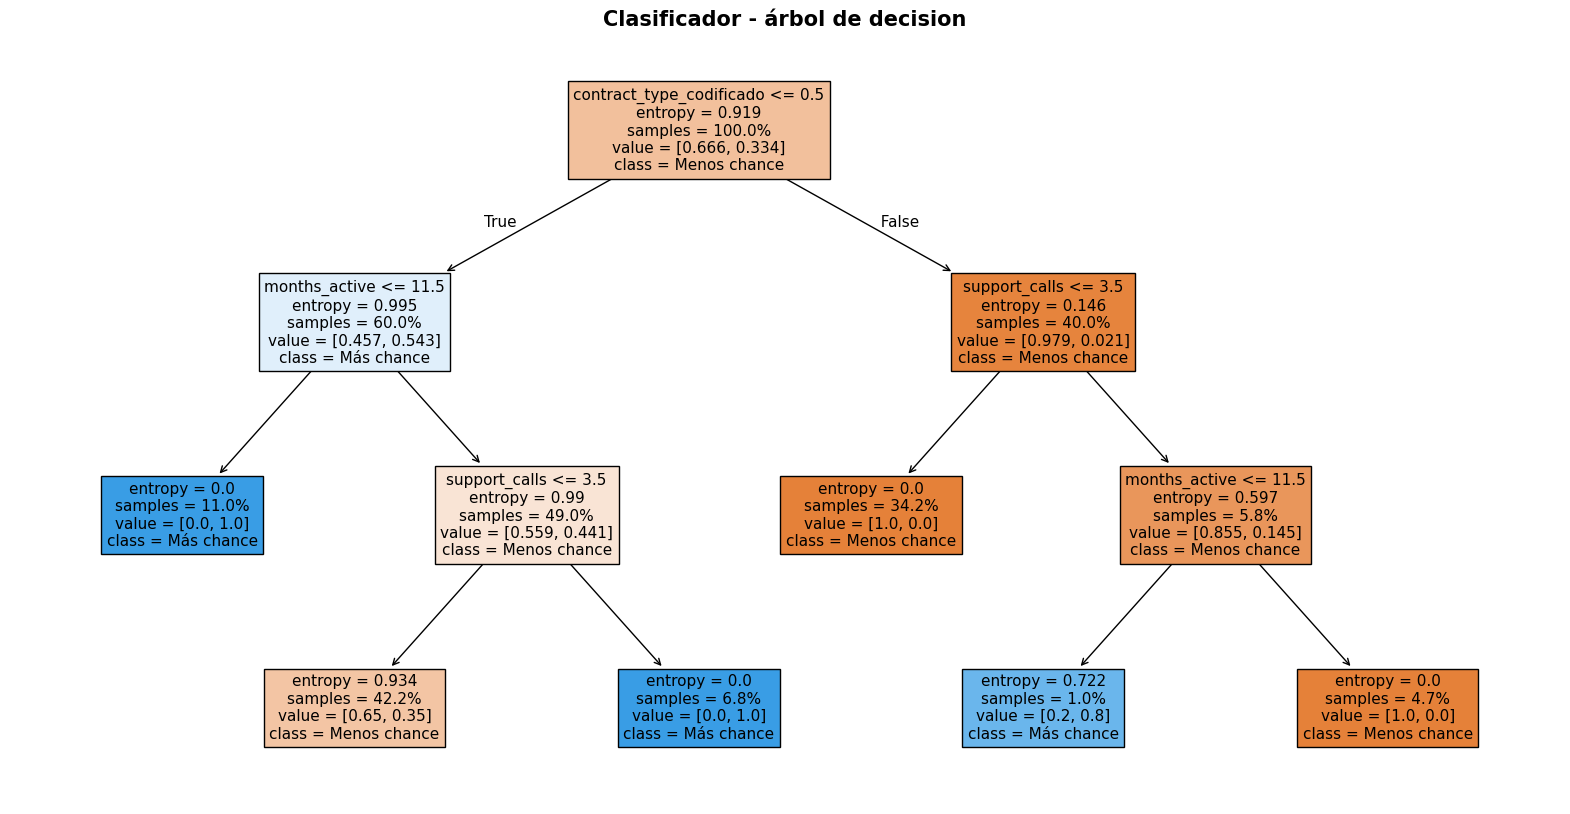

In [88]:
plt.figure(figsize = (20,10))
plot_tree( # Función que permite visualizar el árbol de decisión ajustado.
    tree, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = X_train.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["Menos chance","Más chance"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiqueta todas características de cada nodo.
    proportion = True, # Visualiza las proporciones de datos en cada nodo de decisión,
    filled=True, # Colorea los nodos
    fontsize=11, # Establece el tamaño de la letra del texto dentro de cada nodo.
)
plt.title("Clasificador - árbol de decision", fontsize=15, fontweight="bold")
plt.show()

#### Evaluación del modelo

In [89]:
print(classification_report(y_test,tree.predict(X_test),
                            target_names=["Menor chance de abandono","Mayor chance de abandono"]))

                          precision    recall  f1-score   support

Menor chance de abandono       0.83      1.00      0.90      1998
Mayor chance de abandono       0.99      0.59      0.74      1002

                accuracy                           0.86      3000
               macro avg       0.91      0.79      0.82      3000
            weighted avg       0.88      0.86      0.85      3000



---
✅ **Interpretación**

---

+ La clase "Mayor chance de abandono" tiene una alta precisión (0.99), lo que significa que casi todas las veces que el modelo predice esta clase, acierta.
+ La clase "Mayor chance de abandono" tiene un recall bajo (0.59), es decir, el modelo no está detectando correctamente muchos de los casos reales de abandono.
+ El modelo no detecta bien los casos con "Mayor chance de abandono" (recall bajo), lo cual es preocupante si lo importante es evitar pérdidas o abandonos.

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

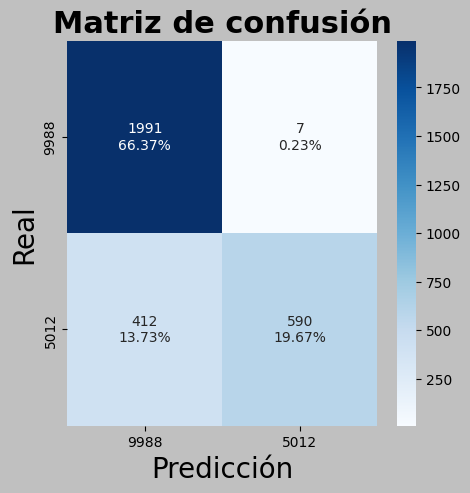

In [90]:
# Realiza las predicciones
y_pred_tree = tree.predict(X_test)
matriz_tree = confusion_matrix(y_test, y_pred_tree)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_tree, clases)

---
✅ **Interpretación**

---
El modelo es muy bueno para detectar quiénes se quedarán.Pero es débil en detectar quiénes podrían abandonar, lo cual podría ser crítico si el objetivo es reducir la fuga de clientes.


##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [91]:
# Obtiene las métricas a partir de la matriz
accuracy_manual_tree, precision_manual_tree, recall_manual_tree, f1_score_manual_tree = metrics_by_matrix(matriz_tree)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_tree))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_tree))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_tree))
print("{0:<15} = {1:.4f}".format("Accuracy", accuracy_manual_tree))

Precision       = 0.9883
Recall          = 0.5888
F1-score        = 0.7380
Accuracy        = 0.8603


In [92]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_tree, precision_manual_tree, accuracy_manual_tree,"con mayor chance de que abandonen")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 58.88% de con mayor chance de que abandonen 
 Se han identificado un 98.83% de clientes con mayor chance de que abandonen y que realmente lo harán 
 El modelo acierta con un 86.03% de acertividad la menor o mayor chance de que abandonden


In [93]:
# Obtiene el valor del área bajo la curva
roc_auc_tree =  roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
print("ROC_AUC score DecisionTree : {:.2f}".format(roc_auc_tree))
print(view_rango(rangos, roc_auc_tree))

ROC_AUC score DecisionTree : 0.92
Muy bueno


In [94]:
auc_dt, tpr_dt, fpr_dt, _= get_auc(y_test, y_pred_tree)
print("{0:<10} = {1:.4f}".format("AUC", auc_dt))
print("{0:<10} = {1}".format("TPR",tpr_dt))
print("{0:<10} = {1}".format("FPR",fpr_dt))

AUC        = 0.7927
TPR        = [0.         0.58882236 1.        ]
FPR        = [0.        0.0035035 1.       ]


In [95]:
history = []
# Agrega resultados al historial
history.append([accuracy_manual_tree,roc_auc_tree])
print(pd.DataFrame(history, index = ['DecisionTreeClassifier'],
            columns = ['Accuracy', 'ROC_AUC']))

                        Accuracy  ROC_AUC
DecisionTreeClassifier  0.860333  0.91527


--
✅ Interpretación
--

- Recall = 58.88%

- Esto quiere decir que el modelo logró detectar solo al 58.88% de los clientes que realmente estaban en riesgo de irse.
F1-score = 73.80%

- Este valor combina precisión y recall. En este caso, está sesgado hacia la alta precisión, pero penalizado por el bajo recall.
F1-score = 73.80%

- Este valor combina precisión y recall. En este caso, está sesgado hacia la alta precisión, pero penalizado por el bajo recall.

### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [96]:
# Define el algoritmo a utilizar Naive Bayes
modelo = GaussianNB()

#### Entrenamiento del modelo - (1 punto)

In [97]:
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
#Prediccion de y
y_pred_bayes = modelo.predict(X_test)

modelo

GaussianNB()

#### Evaluación del modelo - (1 punto)

In [98]:
print(classification_report(y_test,y_pred_bayes, target_names=["Menor chance","Mayor chance"]))

              precision    recall  f1-score   support

Menor chance       0.95      0.78      0.85      1998
Mayor chance       0.67      0.91      0.78      1002

    accuracy                           0.82      3000
   macro avg       0.81      0.85      0.82      3000
weighted avg       0.86      0.82      0.83      3000



#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

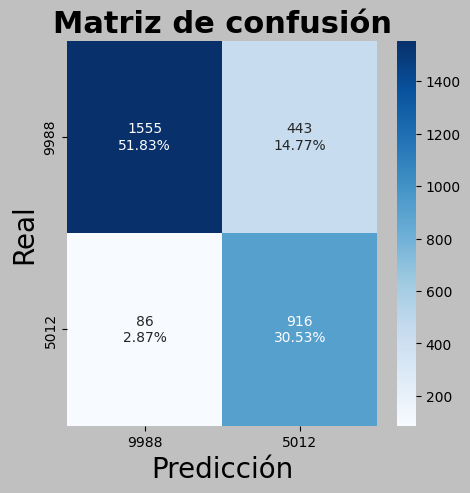

In [99]:
# Determina la matriz de confusión
matriz_bayes = confusion_matrix(y_test, y_pred_bayes)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_bayes, clases)

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [100]:
print("{0:<20} : {1}".format('Accuracy del modelo', accuracy_score(y_test, y_pred_bayes)))
print("{0:<20} : {1}".format('F1 score del modelo', f1_score(y_test, y_pred_bayes)))
print("{0:<20} : {1}".format('Recall del modelo', recall_score(y_test, y_pred_bayes)))

Accuracy del modelo  : 0.8236666666666667
F1 score del modelo  : 0.7759423972892842
Recall del modelo    : 0.9141716566866267


In [101]:
# Obtiene las métricas a partir de la matriz de confusión
accuracy_manual_nb, precision_manual_nb, recall_manual_nb, f1_score_manual_nb = metrics_by_matrix(matriz_bayes)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_nb))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_nb))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_nb))
print("{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual_nb))

Precision       = 0.6740
Recall          = 0.9142
F1-score        = 0.7759
Accuracy        = 0.8237


In [102]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_nb, precision_manual_nb, accuracy_manual_nb,"con mayor chance de que abandonen")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 91.42% de con mayor chance de que abandonen 
 Se han identificado un 67.40% de clientes con mayor chance de que abandonen y que realmente lo harán 
 El modelo acierta con un 82.37% de acertividad la menor o mayor chance de que abandonden


In [103]:
# Obtiene el valor del área bajo la curva
roc_auc_base = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])
print("ROC_AUC score GaussianNB : {:.2f}".format(roc_auc_base))

ROC_AUC score GaussianNB : 0.91


In [104]:
# Guarda el historial de resultados
history.append([accuracy_manual_nb, roc_auc_base])
print(pd.DataFrame(history, index = ['DecisionTree','GaussianNB'],
            columns = ['Accuracy', 'ROC_AUC']))

              Accuracy   ROC_AUC
DecisionTree  0.860333  0.915270
GaussianNB    0.823667  0.910548


---
✅ **Interpretación**

---
Precision = 67.4%
- Esto significa que de todos los casos en los que el modelo predijo que un cliente tenía menor chance de irse de la compañia, acertó en el 67.4%.
- En otras palabras, casi 1 de cada 3 veces el modelo pensó que alguien se quedaría, pero esa persona tenía una alta chance de irse.
- Esto podría ser riesgoso si se usa para decidir a quién prestar atención en temas de retención.

Recall = 91.4%
- Indica que el modelo logró identificar correctamente al 91.4% de los clientes que realmente tenían menor probabilidad de irse.
- Indica que el modelo es bueno detectando a quienes probablemente se queden.

F1 = 77.6%
- Muestra que hay un buen equilibrio entre detectar bien a los que se quedan y equivocarse poco, aunque todavía se puede mejorar.
- Un F1 alto significa que el modelo es consistente, pero no perfecto.

Accuracy = 82.4%
- Esto quiere decir que el modelo acertó en el 82.4% de todos los casos del conjunto de prueba.
- Es un buen rendimiento general, aunque hay que tener cuidado si las clases están desbalanceadas (como parece ocurrir aquí, donde hay más clientes con alta chance de irse que con baja).




Respecto al FP, el modelo predijo que 443 clientes tenían mayor chance de irse, pero en realidad no era así.
Es decir, el modelo se equivocó en aproximadamente un 15% del total de clientes, prediciendo riesgo en clientes que no lo tenían.

Respecto al FN, el modelo predijo que 86 clientes tenían menor chance de irse, pero en realidad sí estaban en riesgo.
Es decir, el modelo se equivocó en solo un 3% del total de clientes, dejando pasar pocos casos realmente importantes.

### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [105]:
# Crea y entrena el modelo
clf_base = LogisticRegression(random_state=29)

#### Entrenamiento del modelo - (1 punto)

In [106]:
#Entrenamiento del modelo
clf_base.fit(X_train, y_train)
#Prediccion de y
y_pred = clf_base.predict(X_test)
clf_base

LogisticRegression(random_state=29)

#### Evaluación del modelo - (1 punto)

In [107]:
clases = ['Menor chance de que abandone', 'Mayor chance de que abandone']
print(classification_report(y_test, y_pred, target_names=clases))

                              precision    recall  f1-score   support

Menor chance de que abandone       0.86      0.88      0.87      1998
Mayor chance de que abandone       0.74      0.71      0.73      1002

                    accuracy                           0.82      3000
                   macro avg       0.80      0.80      0.80      3000
                weighted avg       0.82      0.82      0.82      3000



#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

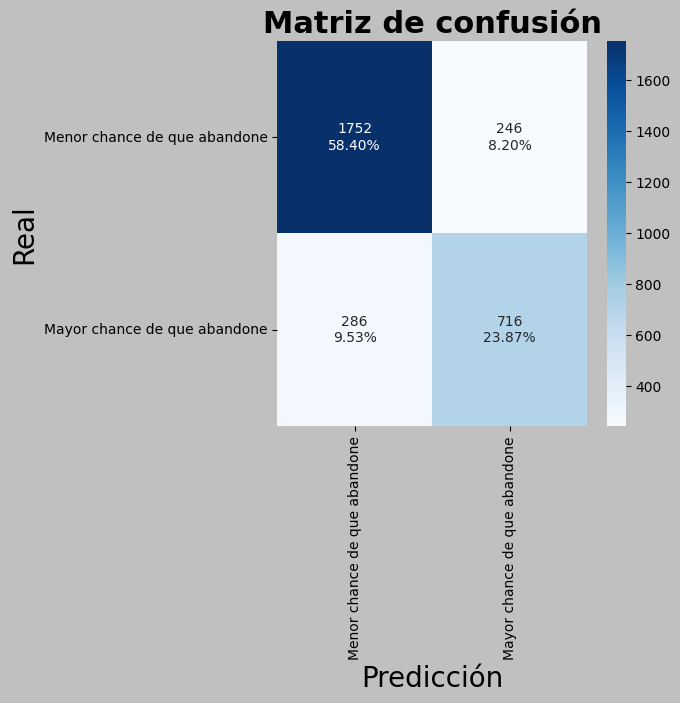

In [108]:
# Determina la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz, clases)

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [109]:
# Obtiene las métricas a partir de la matriz de confusión
accuracy_manual_log, precision_manual_log, recall_manual_log, f1_score_manual_log = metrics_by_matrix(matriz)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_log))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_log))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_log))
print("{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual_log))

Precision       = 0.7443
Recall          = 0.7146
F1-score        = 0.7291
Accuracy        = 0.8227


In [110]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_log, precision_manual_log, accuracy_manual_log,"con mayor chance de que abandonen")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 71.46% de con mayor chance de que abandonen 
 Se han identificado un 74.43% de clientes con mayor chance de que abandonen y que realmente lo harán 
 El modelo acierta con un 82.27% de acertividad la menor o mayor chance de que abandonden


---
✅ **Interpretación**

---
Precision = 74.43%

Esto significa que de todos los casos en los que el modelo predijo que un cliente tenía mayor probabilidad de irse, acertó en el 74.43%.
En otras palabras, 1 de cada 4 veces el modelo generó una falsa alarma, prediciendo abandono en alguien que no lo tenía.

Recall = 71.46%

Esto indica que el modelo fue capaz de identificar correctamente al 71.46% de los clientes que realmente estaban en riesgo de irse.

F1-score = 72.91%

El F1 combina precisión y recall, y en este caso refleja un equilibrio razonablemente bueno entre ambas métricas.

Accuracy = 82.27%

Esto quiere decir que el modelo acertó en más del 82% de todas las predicciones hechas.

 Falsos Positivos (FP)
El modelo predijo que algunos clientes estaban en riesgo de irse (mayor chance), pero en realidad no lo estaban.

In [111]:
# Obtiene el valor del área bajo la curva
roc_auc_score_log = roc_auc_score(y_test, clf_base.predict_proba(X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_base))

ROC_AUC score LogisticRegression : 0.91


In [112]:
print(view_rango(rangos, roc_auc_score_log))

Muy bueno


In [113]:
# Guarda el historial de resultados
history.append([accuracy_manual_log, roc_auc_score_log])
print(pd.DataFrame(history, index = ['DecisionTree','GaussianNB','LogisticRegression'],
            columns = ['Accuracy', 'ROC_AUC']))

                    Accuracy   ROC_AUC
DecisionTree        0.860333  0.915270
GaussianNB          0.823667  0.910548
LogisticRegression  0.822667  0.911579


### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [114]:
# Escriba su código acá
random_forest = RandomForestClassifier(random_state = 29, n_estimators = 30, criterion = "entropy") # Instancia Random Forest.


#### Entrenamiento del modelo - (1 punto)

In [115]:
random_forest.fit( # Entrena el modelo.
    X_train,
    y_train
)
y_pred_rf = random_forest.predict(X_test)

random_forest

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=29)

In [116]:
# El mejor estimador
random_forest.estimators_[-1]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=643252703)

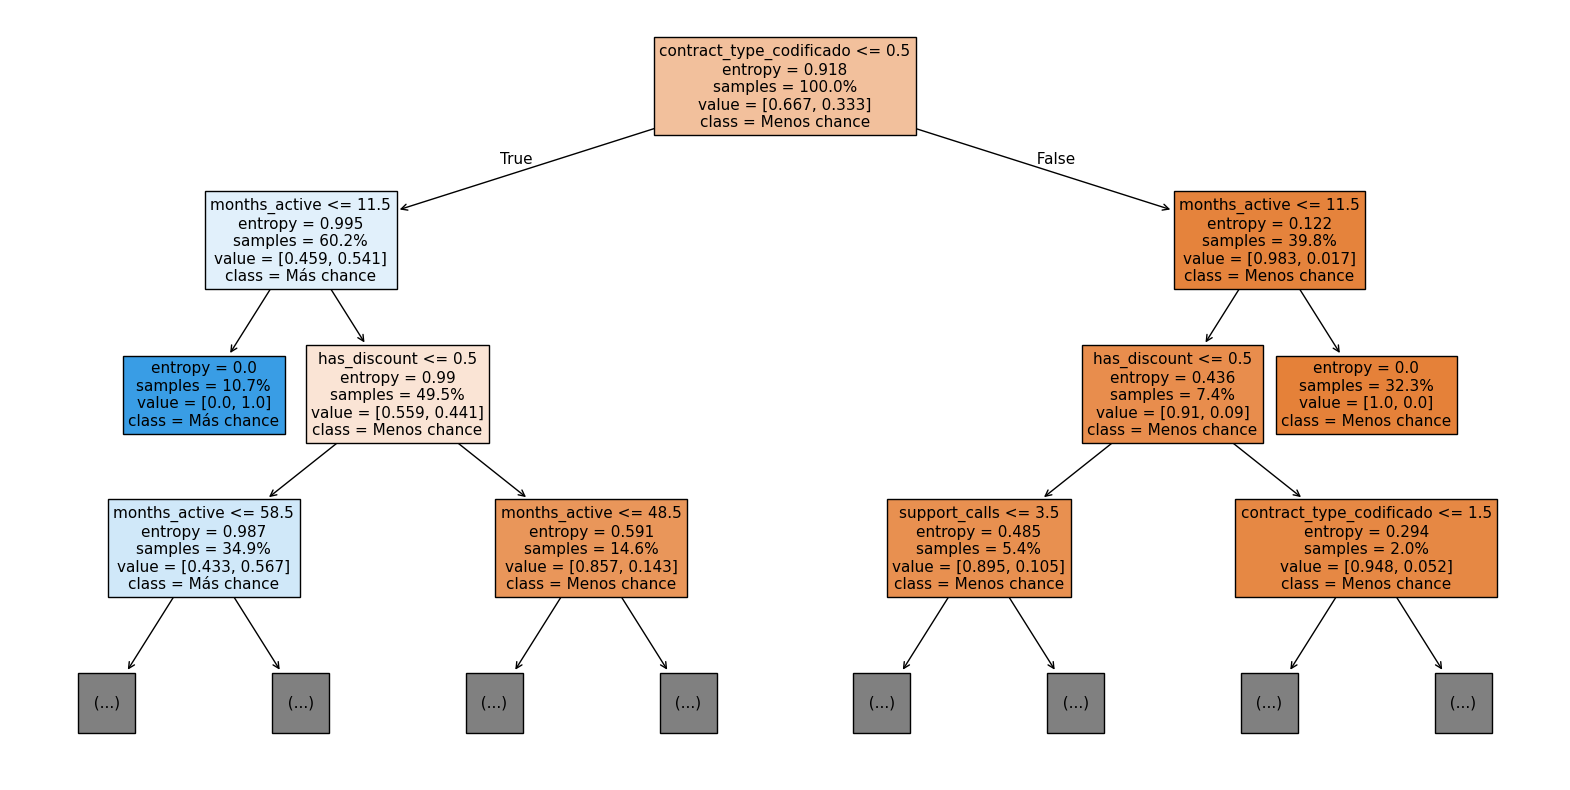

In [117]:
# Escriba su código acá
plt.figure(figsize = (20,10))
plot_tree( # Función que permite visualizar el árbol de decisión ajustado.
    random_forest.estimators_[-1], # Objeto árbol de decisión entrenado.
    feature_names = features, # Nombres de las variables utilizadas para entrenar. (data_final.drop(churn, age, monthly_spend)
    class_names = ["Menos chance","Más chance"], # Nombre de las clases que se están prediciendo.
    label = "all", # Etiqueta todas características de cada nodo.
    proportion = True, # Visualiza las proporciones de datos en cada nodo de decisión,
    filled=True, # Colorea los nodos
    fontsize=11, # Establece el tamaño de la letra del texto dentro de cada nodo.
    max_depth = 3 # Profundidad màxima a mostrar
)
plt.show();

#### Evaluación del modelo - (1 punto)

In [118]:
print(classification_report(
    y_test,
    random_forest.predict(X_test), target_names=clases
))

                              precision    recall  f1-score   support

Menor chance de que abandone       0.91      0.88      0.89      1998
Mayor chance de que abandone       0.77      0.82      0.80      1002

                    accuracy                           0.86      3000
                   macro avg       0.84      0.85      0.84      3000
                weighted avg       0.86      0.86      0.86      3000



#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

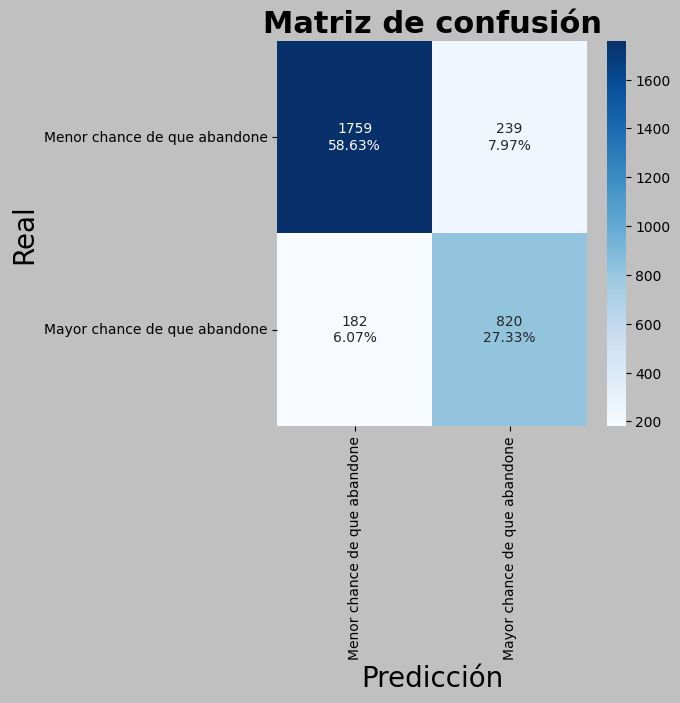

In [119]:
# Realiza las predicciones
y_pred_rf = random_forest.predict(X_test)
matriz_rf = confusion_matrix(y_test, y_pred_rf)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_rf, clases)

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [120]:
# Obtiene las métricas a partir de la matriz de confusión
accuracy_manual_rf, precision_manual_rf, recall_manual_rf, f1_score_manual_rf = metrics_by_matrix(matriz_rf)
print("{0:<15} = {1:.4f}".format("Precision", precision_manual_rf))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_rf))
print("{0:<15} = {1:.4f}".format("F1-score", f1_score_manual_rf))
print("{0:<15} = {1:.4f}".format("Accuracy", accuracy_manual_rf))

Precision       = 0.7743
Recall          = 0.8184
F1-score        = 0.7957
Accuracy        = 0.8597


In [121]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_rf, precision_manual_rf, accuracy_manual_rf,"con mayor chance de que abandonen")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 81.84% de con mayor chance de que abandonen 
 Se han identificado un 77.43% de clientes con mayor chance de que abandonen y que realmente lo harán 
 El modelo acierta con un 85.97% de acertividad la menor o mayor chance de que abandonden


In [122]:
# Obtiene el valor del área bajo la curva
roc_auc_rf =  roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
print("ROC_AUC score RandomForest : {:.2f}".format(roc_auc_rf))
print(view_rango(rangos, roc_auc_rf))

ROC_AUC score RandomForest : 0.95
Muy bueno


In [123]:
auc_rf, tpr_rf, fpr_rf, _ = get_auc(y_test, y_pred_rf)
print("{0:<10} = {1:.4f}".format("AUC", auc_rf))
print("{0:<10} = {1}".format("TPR",tpr_rf))
print("{0:<10} = {1}".format("FPR",fpr_rf))

AUC        = 0.8494
TPR        = [0.         0.81836327 1.        ]
FPR        = [0.         0.11961962 1.        ]


In [124]:
# Obtiene la importancia que el algoritmo le da a las variables
df_importancia = pd.DataFrame(random_forest.feature_importances_.reshape(-1, 1),
             index = random_forest.feature_names_in_, columns = ['importancia'])
df_importancia.importancia.sort_values(ascending = False)

,importancia
contract_type_codificado,0.493966
months_active,0.202510
support_calls,0.179481
has_discount,0.124044


---
✅ **Interpretación**

---

+ Precision = 77.43%

+ Esto indica que de todos los casos en los que el modelo predijo que un cliente tenía mayor chance de irse, acertó en el 77.43%.
Recall = 81.84%

+ Esto significa que el modelo logró detectar correctamente al 81.84% de los clientes que realmente estaban en riesgo de irse.
F1-score = 79.57%

+ El F1-score representa el balance entre precisión y recall.
Accuracy = 85.97%

+ Esto quiere decir que el modelo acertó en casi el 86% de todos los casos del conjunto de prueba.
Falsos Positivos (FP)
+ El modelo generó algunas falsas alarmas, prediciendo abandono donde no lo había, pero el porcentaje es manejable (alrededor del 22%).
+ Falsos Negativos (FN)
El modelo dejó pasar aproximadamente el 18% de los clientes que sí estaban en riesgo.

### Comparación de los modelos - (2 puntos)

In [125]:
# Guarda el historial de resultados
history.append([accuracy_manual_rf, roc_auc_rf])
print(pd.DataFrame(history, index = ['DecisionTree','GaussianNB','LogisticRegression','RandomForest'],
            columns = ['Accuracy', 'ROC_AUC']))

                    Accuracy   ROC_AUC
DecisionTree        0.860333  0.915270
GaussianNB          0.823667  0.910548
LogisticRegression  0.822667  0.911579
RandomForest        0.859667  0.953547


---
✅ **Interpretación**

---

+ RandomForest es el mejor modelo general: alto accuracy y el mayor ROC_AUC.

+ DecisionTree también tiene buen rendimiento, pero puede ser menos robusto que RandomForest.

+ LogisticRegression y GaussianNB tienen rendimientos aceptables, pero inferiores.

+ Cabe recalcar que para ordenar cada algoritmo nos basamos en el valor ROC AUC de cada uno.



---
✅ **¿Porque priorizamos ROC AUC antes que Accuracy?**

---
Utilizamos ROC AUC antes que Accuracy, ya que este mide la capacidad del modelo para distinguir entre clases sin importar el umbral de decisión. Además que Accuracy, especialmente si las clases están desbalanceadas.